# R ML Crash Course_Part 7: Binary Classification Project Template

## Full Day Workshop for user learn Data Science with R
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Project Template: 

In [9]:
# R Project Template

# 1. Prepare Problem
# a) Load packages
# b) Load dataset
# c) Split-out validation dataset

# 2. Summarize Data (EDA)
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Test options and evaluation metric
# b) Spot-Check Algorithms
# c) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Binary Classification: Breast Cancer Tiss
Wisconsin Breast Cancer Dataset described in Chapter 5.
Each record in the dataset represents one breast cancer tissue sample. The data was collected
from University of Wisconsin Hospitals. Below is a summary

- Sample id number.
- Clump Thickness.
- Uniformity of Cell Size.
- Uniformity of Cell Shape.
- Marginal Adhesion.
- Single Epithelial Cell Size.
- Bare Nuclei.
- Bland Chromatin.
-  Normal Nucleoli.
- Mitoses.
- Class.

In [20]:
# load packages
# load packages
library(mlbench)
library(caret)
# Load data
data(BreastCancer)
head(BreastCancer)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign
1017122,8,10,10,8,7,10,9,7,1,malignant


##  Validation Dataset

In [63]:
# Split out validation dataset
# create a list of 80% of the rows in the original dataset we can use for training
set.seed(7)
validationIndex <- createDataPartition(BreastCancer$Class, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- BreastCancer[-validationIndex,]
# use the remaining 80% of data to training and testing the models
dataset <- BreastCancer[validationIndex,] 

In [64]:
dim(validation)
dim(dataset)

[1] 139  11

[1] 560  11

In [ ]:
# https://www.r-bloggers.com/using-apply-sapply-lapply-in-r/

In [65]:
sapply(dataset, class)

$Id
[1] "character"

$Cl.thickness
[1] "ordered" "factor" 

$Cell.size
[1] "ordered" "factor" 

$Cell.shape
[1] "ordered" "factor" 

$Marg.adhesion
[1] "ordered" "factor" 

$Epith.c.size
[1] "ordered" "factor" 

$Bare.nuclei
[1] "factor"

$Bl.cromatin
[1] "factor"

$Normal.nucleoli
[1] "factor"

$Mitoses
[1] "factor"

$Class
[1] "factor"

### Factor, Ordinal, Integer Num

- For modeling it may be more useful to work with the data as numbers than factors. 
- Factors
might make things easier for decision tree algorithms (or not). 
- Given that there is an ordinal
relationship between the levels we can expose that structure to other algorithms better if we
work directly with the integer numbe

In [66]:
# R dataframe can delete column directly by using "-" + "column index"
dataset3 <- dataset[,-2]

In [67]:
dataset <- dataset[,-1]
for(i in 1:9) {
dataset [,i] <- as.numeric(as.character(dataset[,i]))
    }

In [68]:
sapply(dataset, class)

Cl.thickness       Cell.size      Cell.shape   Marg.adhesion    Epith.c.size 
      "numeric"       "numeric"       "numeric"       "numeric"       "numeric" 
    Bare.nuclei     Bl.cromatin Normal.nucleoli         Mitoses           Class 
      "numeric"       "numeric"       "numeric"       "numeric"        "factor"

In [69]:
# if wanna change the data type from factor to numeric
# breast$class <- as.numeric(as.character(breast$class))

# if want to change multiple columnt to class
# indx <- sapply(breast, is.factor)
# breast[indx] <- lapply(breast[indx], function(x) as.numeric(as.character(x)))

summary(dataset)

  Cl.thickness      Cell.size        Cell.shape     Marg.adhesion   
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 2.000   Median : 1.000  
 Mean   : 4.384   Mean   : 3.116   Mean   : 3.198   Mean   : 2.875  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
  Epith.c.size     Bare.nuclei      Bl.cromatin     Normal.nucleoli 
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.232   Mean   : 3.468   Mean   : 3.405   Mean   : 2.877  
 3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 4.250   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000  

## Observation
- we can see we have 13 NA values for the Bare.nuclei attribute. 
- This suggests
we may need to remove the records (or impute values) with NA values for some analysis and
modeling techniques. 
- We can also see that all attributes have integer values in the range [1,10].
- This suggests that we may not see much benefit from normalizing attributes for instance-based
methods like KNN.
- We can also see that there is some imbalance in the Class values.

In [70]:
cbind(freq=table(dataset$class), precentage=prop.table(table(dataset$Class))*100)

,precentage
benign,65.53571
malignant,34.46429


In [34]:
cbind(freq=table(dataset$Class), percentage=prop.table(table(dataset$Class)))

,freq,percentage
benign,367,0.6553571
malignant,193,0.3446429


In [71]:
complete_cases <- complete.cases(dataset)
cor(dataset[complete_cases,1:9])

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cl.thickness,1.0000000,0.6200884,0.6302917,0.4741733,0.5089557,0.5600770,0.5290733,0.5143933,0.3426018
Cell.size,0.6200884,1.0000000,0.9011340,0.7141150,0.7404824,0.6687226,0.7502700,0.7072182,0.4506532
Cell.shape,0.6302917,0.9011340,1.0000000,0.6846206,0.7043423,0.6896724,0.7276114,0.7127155,0.4345125
Marg.adhesion,0.4741733,0.7141150,0.6846206,1.0000000,0.5860660,0.6660165,0.6660533,0.6031036,0.4314910
Epith.c.size,0.5089557,0.7404824,0.7043423,0.5860660,1.0000000,0.5568406,0.6102032,0.6433364,0.4775271
Bare.nuclei,0.5600770,0.6687226,0.6896724,0.6660165,0.5568406,1.0000000,0.6668483,0.5795794,0.3539473
Bl.cromatin,0.5290733,0.7502700,0.7276114,0.6660533,0.6102032,0.6668483,1.0000000,0.6838547,0.3545122
Normal.nucleoli,0.5143933,0.7072182,0.7127155,0.6031036,0.6433364,0.5795794,0.6838547,1.0000000,0.4084127
Mitoses,0.3426018,0.4506532,0.4345125,0.4314910,0.4775271,0.3539473,0.3545122,0.4084127,1.0000000


In [72]:
# summarize correlations between input variables
complete_cases <- complete.cases(dataset)
cor(dataset[complete_cases,1:9])

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cl.thickness,1.0000000,0.6200884,0.6302917,0.4741733,0.5089557,0.5600770,0.5290733,0.5143933,0.3426018
Cell.size,0.6200884,1.0000000,0.9011340,0.7141150,0.7404824,0.6687226,0.7502700,0.7072182,0.4506532
Cell.shape,0.6302917,0.9011340,1.0000000,0.6846206,0.7043423,0.6896724,0.7276114,0.7127155,0.4345125
Marg.adhesion,0.4741733,0.7141150,0.6846206,1.0000000,0.5860660,0.6660165,0.6660533,0.6031036,0.4314910
Epith.c.size,0.5089557,0.7404824,0.7043423,0.5860660,1.0000000,0.5568406,0.6102032,0.6433364,0.4775271
Bare.nuclei,0.5600770,0.6687226,0.6896724,0.6660165,0.5568406,1.0000000,0.6668483,0.5795794,0.3539473
Bl.cromatin,0.5290733,0.7502700,0.7276114,0.6660533,0.6102032,0.6668483,1.0000000,0.6838547,0.3545122
Normal.nucleoli,0.5143933,0.7072182,0.7127155,0.6031036,0.6433364,0.5795794,0.6838547,1.0000000,0.4084127
Mitoses,0.3426018,0.4506532,0.4345125,0.4314910,0.4775271,0.3539473,0.3545122,0.4084127,1.0000000


In [24]:
install.packages('PerformanceAnalytics')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)
also installing the dependency ‘xts’



In [49]:
dataset4 <- dataset[,-10]

## Unimodal Data Vizualization

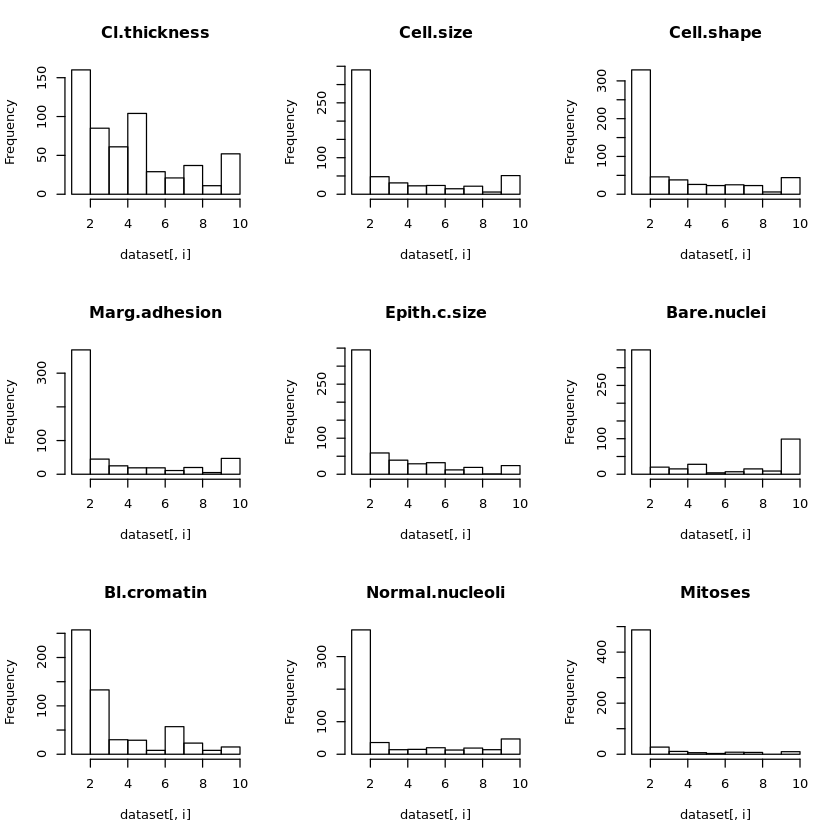

In [86]:
# histograms each attribute
par(mfrow=c(3,3))
for(i in 1:9) {
hist(dataset[,i], main=names(dataset)[i])
}

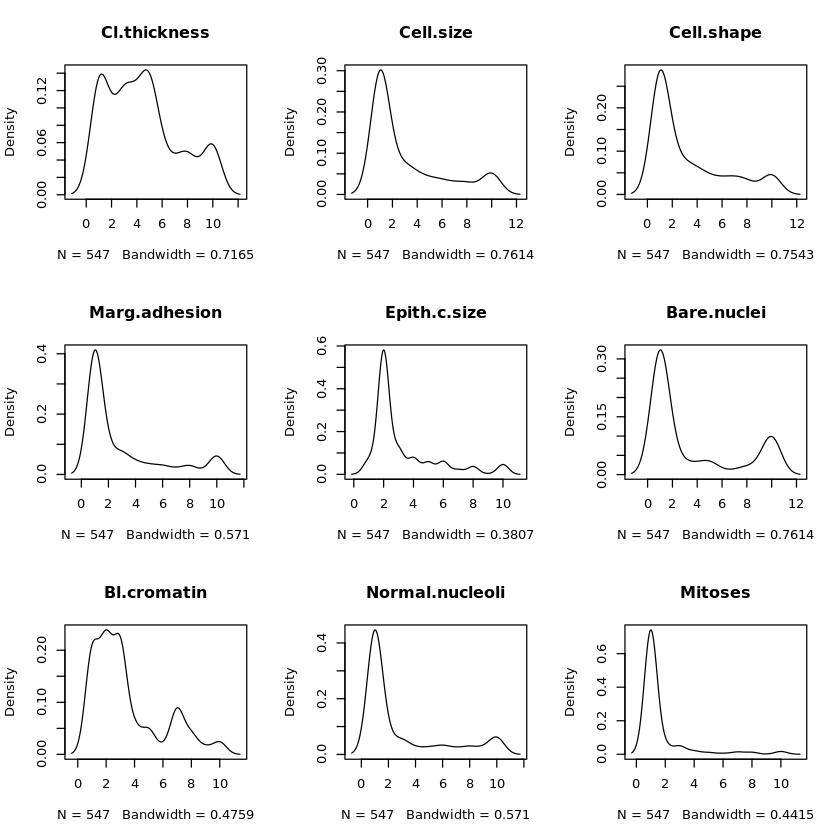

In [81]:
# density plot for each attribute
par(mfrow=c(3,3))
complete_cases <- complete.cases(dataset)
for(i in 1:9) {
plot(density(dataset[complete_cases,i]), main=names(dataset)[i])
}

#### These plots add more support to our initial ideas. We can see bimodal distributions (two bumps) and exponential-looking distributions.

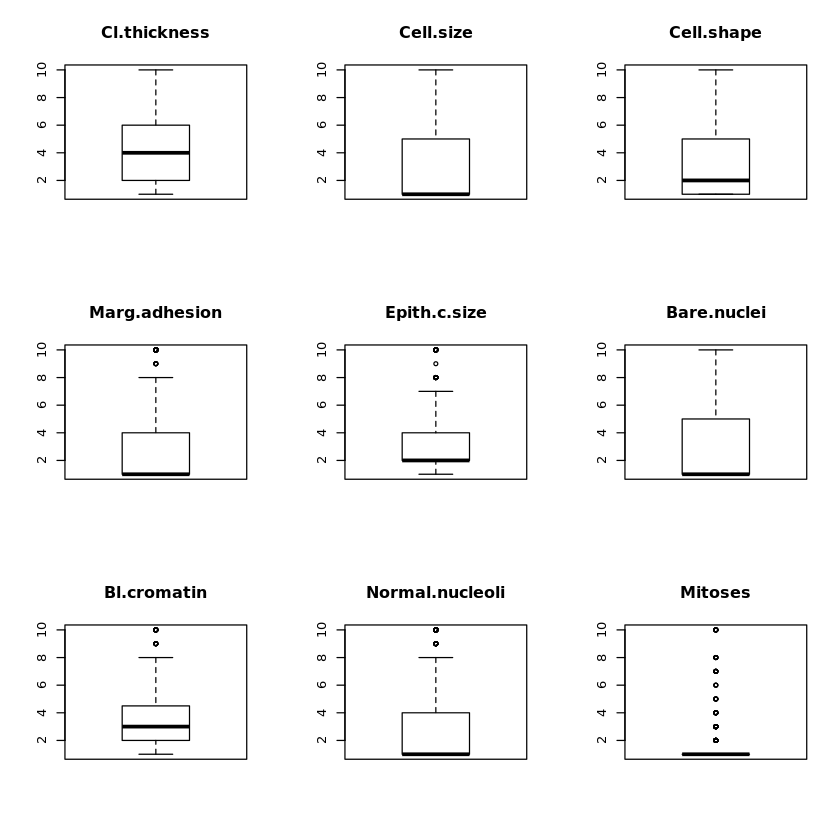

In [82]:
# boxplots for each attribute
par(mfrow=c(3,3))
for(i in 1:9) {
boxplot(dataset[,i], main=names(dataset)[i])
}

## MultiModal Data Visualization
- Let's start with a scatter plot
matrix of the attributes colored by the class values. 
- Because the data is discrete (integer values)
we need to add some jitter to make the scatter plots useful, 
- otherwise the dots will all be on top
of each other.

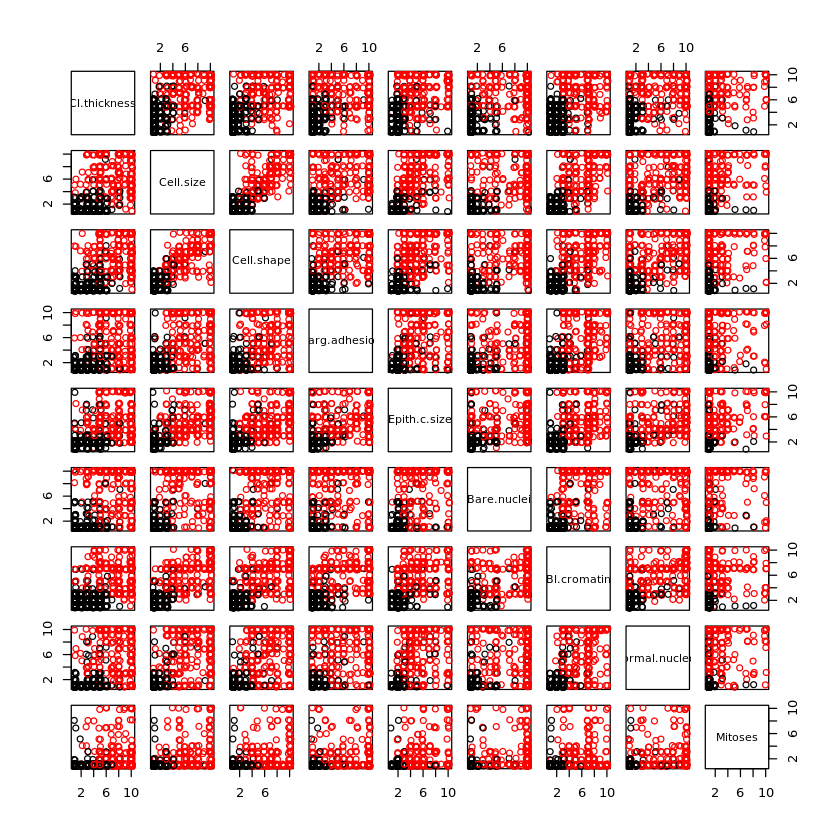

In [87]:
# scatter plot matrix
jittered_x <- sapply(dataset[,1:9], jitter)
pairs(jittered_x, names(dataset[,1:9]), col=dataset$Class)

#### We can see that the black (benign) a part to be clustered around the bottom-right corner (smaller values) and red (malignant) are all over the place.

## Bar Chart
- Because the data is discrete, 
- we can use bar plots to get an idea of the interaction of the
distribution of each attribute and how they breakdown by class value.

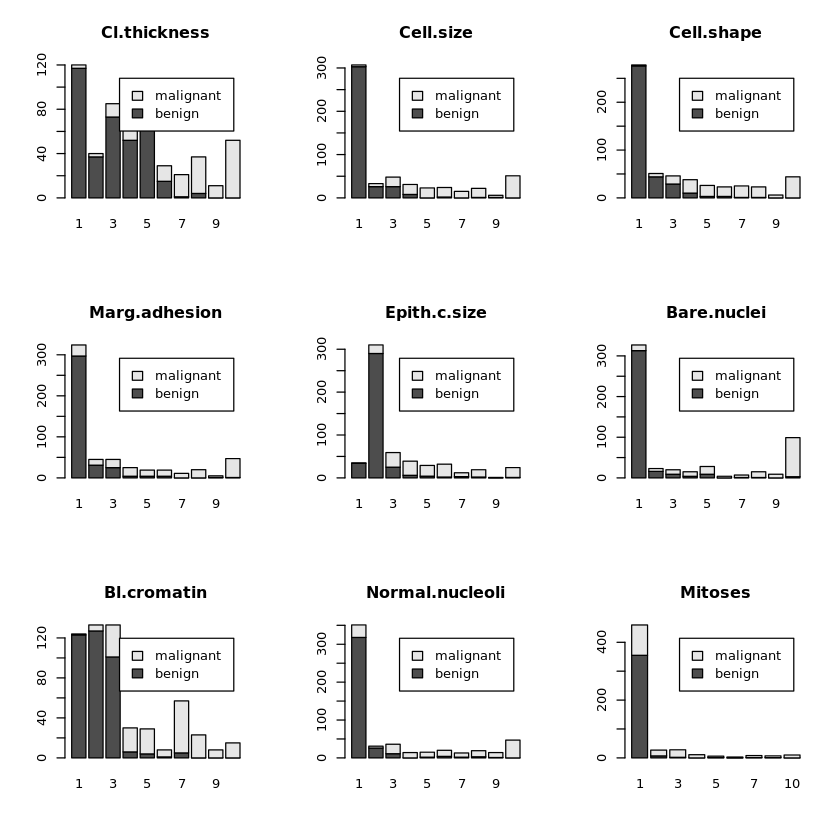

In [88]:
# bar plots of each variable by class
par(mfrow=c(3,3))
for(i in 1:9) {
barplot(table(dataset$Class,dataset[,i]), main=names(dataset)[i],
legend.text=unique(dataset$Class))
}

#### This gives us a more nuanced idea of how the benign values clustered at the left (smaller values) of each distribution and malignant values are all over the place.

# Baseline & Evaluation Critiera
- This is a binary classication problem. 
- For simplicity, we will use Accuracy and Kappa metrics. 
- Given
that it is a medical test, we could have gone with the Area Under ROC Curve (AUC) 
- and
looked at the sensitivity and specicity to select the best algorithms.

In [89]:
# 10-fold cross-validation with 3 repeats
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach

Attaching package: ‘foreach’

The following object is masked from ‘package:SparkR’:

    when

Loaded glmnet 2.0-13

Loading required package: rpart
Loading required package: klaR
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning 


Call:
summary.resamples(object = results)

Models: LG, LDA, GLMNET, KNN, CART, NB, SVM 
Number of resamples: 30 

Accuracy 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LG     0.9091  0.9455 0.9636 0.9635  0.9815 1.0000    0
LDA    0.9091  0.9447 0.9633 0.9592  0.9815 0.9821    0
GLMNET 0.9091  0.9455 0.9640 0.9647  0.9815 1.0000    0
KNN    0.9091  0.9630 0.9815 0.9708  0.9818 1.0000    0
CART   0.8571  0.9259 0.9444 0.9349  0.9455 0.9818    0
NB     0.9259  0.9444 0.9633 0.9616  0.9818 1.0000    0
SVM    0.9074  0.9325 0.9630 0.9519  0.9636 0.9818    0

Kappa 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LG     0.8014  0.8786 0.9206 0.9192  0.9599 1.0000    0
LDA    0.7989  0.8752 0.9175 0.9089  0.9599 0.9607    0
GLMNET 0.8014  0.8786 0.9219 0.9219  0.9599 1.0000    0
KNN    0.8014  0.9175 0.9591 0.9354  0.9603 1.0000    0
CART   0.6957  0.8346 0.8758 0.8573  0.8796 0.9603    0
NB     0.8336  0.8802 0.9207 0.9159  0.9593 1.0000    0
SVM    0.8041  0.8544 0.920

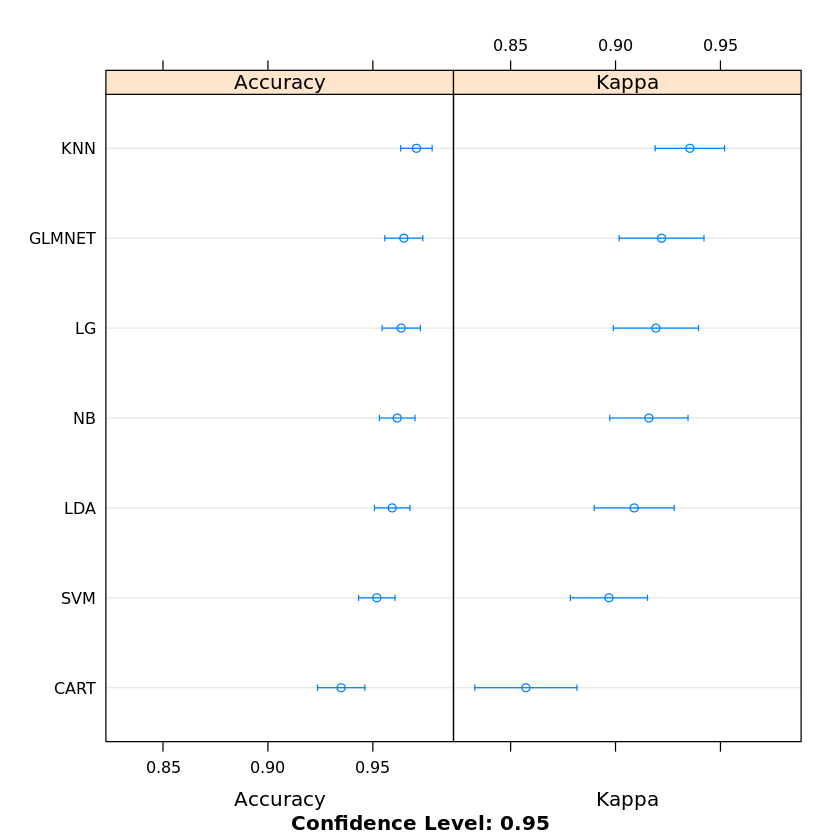

In [90]:
# LG
set.seed(7)
fit.glm <- train(Class~., data=dataset, method="glm", metric=metric,
trControl=trainControl, na.action=na.omit)
# LDA
set.seed(7)
fit.lda <- train(Class~., data=dataset, method="lda", metric=metric,
trControl=trainControl, na.action=na.omit)
# GLMNET
set.seed(7)
fit.glmnet <- train(Class~., data=dataset, method="glmnet", metric=metric,
trControl=trainControl, na.action=na.omit)
# KNN
set.seed(7)
fit.knn <- train(Class~., data=dataset, method="knn", metric=metric,
trControl=trainControl, na.action=na.omit)
# CART
set.seed(7)
fit.cart <- train(Class~., data=dataset, method="rpart", metric=metric,
trControl=trainControl, na.action=na.omit)
# Naive Bayes
set.seed(7)
fit.nb <- train(Class~., data=dataset, method="nb", metric=metric, trControl=trainControl,
na.action=na.omit)
# SVM
set.seed(7)
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric,
trControl=trainControl, na.action=na.omit)


# Compare algorithms
results <- resamples(list(LG=fit.glm, LDA=fit.lda, GLMNET=fit.glmnet, KNN=fit.knn,
CART=fit.cart, NB=fit.nb, SVM=fit.svm))
summary(results)
dotplot(results)

- The problem is learnable. We
can see that KNN (97.08%) and 
- logistic regression (LG was 96.35% and GLMNET was 96.47%)
had the highest accuracy on the problem

## Data Transformation: Box Cox


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(


Call:
summary.resamples(object = transformResults)

Models: LG, LDA, GLMNET, KNN, CART, NB, SVM 
Number of resamples: 30 

Accuracy 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LG     0.9091  0.9498 0.9636 0.9629  0.9815 1.0000    0
LDA    0.9091  0.9457 0.9729 0.9684  0.9818 1.0000    0
GLMNET 0.9273  0.9630 0.9636 0.9690  0.9818 1.0000    0
KNN    0.9091  0.9636 0.9815 0.9714  0.9818 1.0000    0
CART   0.8571  0.9259 0.9444 0.9349  0.9455 0.9818    0
NB     0.9273  0.9630 0.9636 0.9690  0.9818 1.0000    0
SVM    0.9273  0.9630 0.9729 0.9720  0.9818 1.0000    0

Kappa 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LG     0.8062  0.8889 0.9207 0.9184  0.9599 1.0000    0
LDA    0.8062  0.8839 0.9411 0.9317  0.9603 1.0000    0
GLMNET 0.8431  0.9190 0.9215 0.9324  0.9599 1.0000    0
KNN    0.8062  0.9199 0.9591 0.9380  0.9603 1.0000    0
CART   0.6957  0.8346 0.8758 0.8573  0.8796 0.9603    0
NB     0.8392  0.9190 0.9215 0.9324  0.9602 1.0000    0
SVM    0.8468  0.9

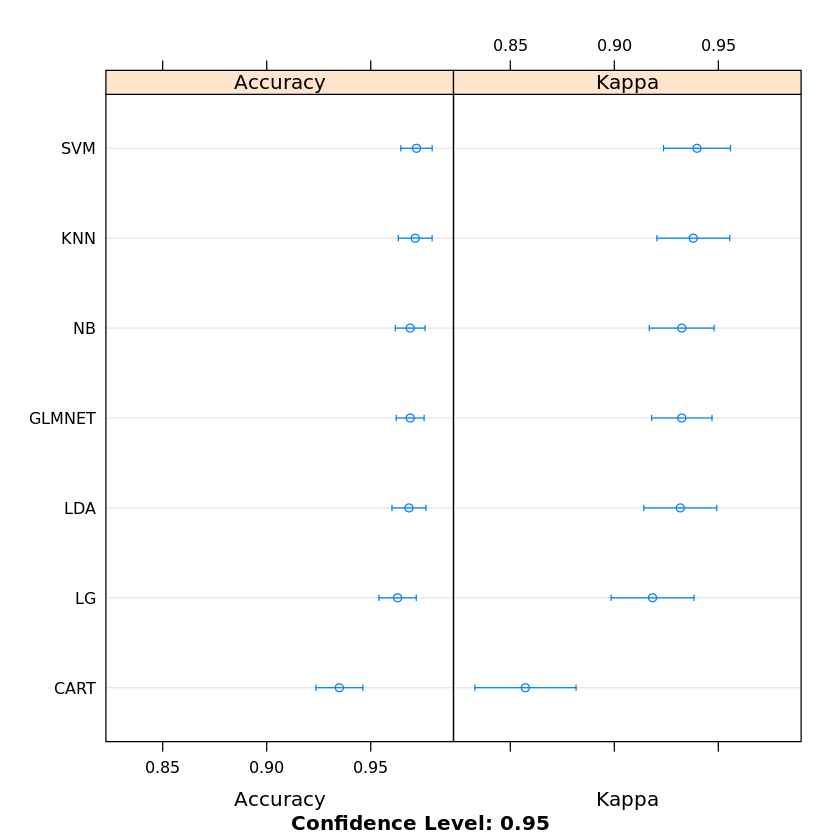

In [91]:
# 10-fold cross-validation with 3 repeats
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"
# LG
set.seed(7)
fit.glm <- train(Class~., data=dataset, method="glm", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# LDA
set.seed(7)
fit.lda <- train(Class~., data=dataset, method="lda", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# GLMNET
set.seed(7)
fit.glmnet <- train(Class~., data=dataset, method="glmnet", metric=metric,
preProc=c("BoxCox"), trControl=trainControl, na.action=na.omit)
# KNN
set.seed(7)
fit.knn <- train(Class~., data=dataset, method="knn", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# CART
set.seed(7)
fit.cart <- train(Class~., data=dataset, method="rpart", metric=metric,
preProc=c("BoxCox"), trControl=trainControl, na.action=na.omit)
# Naive Bayes
set.seed(7)
fit.nb <- train(Class~., data=dataset, method="nb", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# SVM
set.seed(7)
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric,
preProc=c("BoxCox"), trControl=trainControl, na.action=na.omit)


# Compare algorithms
transformResults <- resamples(list(LG=fit.glm, LDA=fit.lda, GLMNET=fit.glmnet, KNN=fit.knn,
CART=fit.cart, NB=fit.nb, SVM=fit.svm))
summary(transformResults)
dotplot(transformResults)

## Tunning SVM

Support Vector Machines with Radial Basis Function Kernel 

547 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: Box-Cox transformation (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 492, 492, 493, 492, 493, 493, ... 
Resampling results across tuning parameters:

  sigma  C   Accuracy   Kappa    
  0.025   1  0.9689542  0.9330945
  0.025   2  0.9683482  0.9317414
  0.025   3  0.9683482  0.9317414
  0.025   4  0.9677421  0.9305106
  0.025   5  0.9677421  0.9305106
  0.025   6  0.9671473  0.9292330
  0.025   7  0.9671473  0.9292330
  0.025   8  0.9665300  0.9279271
  0.025   9  0.9652954  0.9252518
  0.025  10  0.9646781  0.9238842
  0.050   1  0.9695603  0.9344182
  0.050   2  0.9707836  0.9371447
  0.050   3  0.9683594  0.9319420
  0.050   4  0.9689654  0.9332653
  0.050   5  0.9677641  0.9305695
  0.050   6  0.9683702  0.9319253
  0.050   7  0.9677641  0.9306658
  0.050   8  0.9683702  0.9318966
  0.050   9  0.9677641  

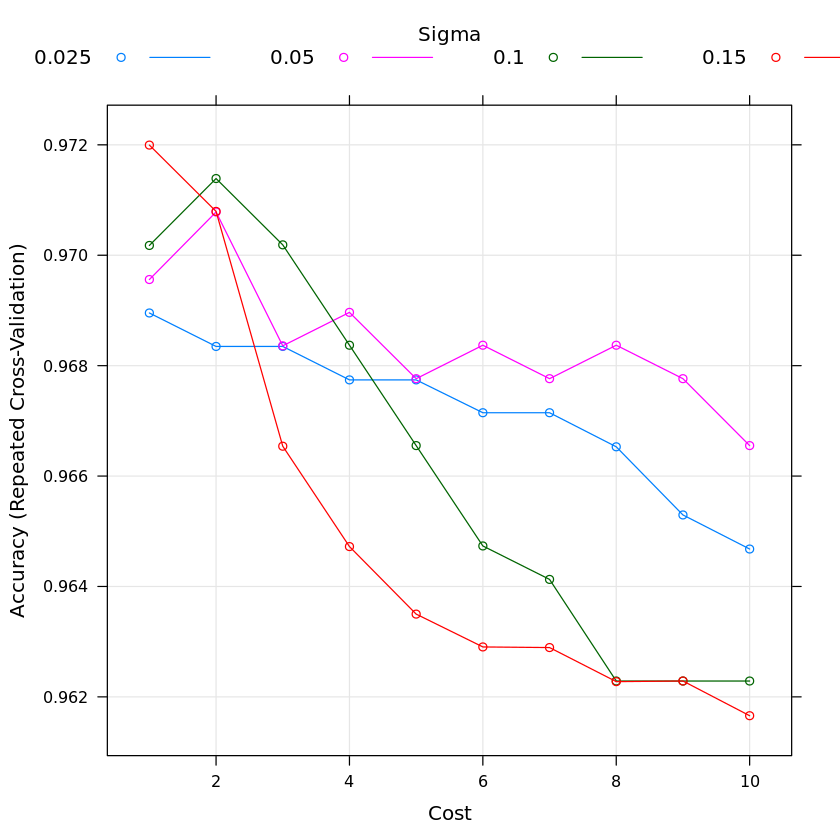

In [92]:
# 10-fold cross-validation with 3 repeats
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"
set.seed(7)
grid <- expand.grid(.sigma=c(0.025, 0.05, 0.1, 0.15), .C=seq(1, 10, by=1))
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric, tuneGrid=grid,
preProc=c("BoxCox"), trControl=trainControl, na.action=na.omit)
print(fit.svm)
plot(fit.svm)

## Observation
- We can see that we have made very little dierence to the results. 
- The most accurate model
had a score of 97.19% (the same as our previously rounded score of 97.20%) 
- using a sigma =
0.15 and C = 1.

## Tunning KNN
- The KNN implementation has one parameter that we can tune with caret: k, 
- the number of
closest instances to collect in order to make a prediction. Let's try all k values between 1 and
20.

k-Nearest Neighbors 

547 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: Box-Cox transformation (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 492, 492, 493, 492, 493, 493, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9524667  0.8953398
   2  0.9512767  0.8927284
   3  0.9659019  0.9257775
   4  0.9671469  0.9283583
   5  0.9707728  0.9365613
   6  0.9689210  0.9325529
   7  0.9713676  0.9379343
   8  0.9731966  0.9421159
   9  0.9713897  0.9379635
  10  0.9719958  0.9393201
  11  0.9714117  0.9380798
  12  0.9714117  0.9380798
  13  0.9701996  0.9354319
  14  0.9707949  0.9366855
  15  0.9701776  0.9353156
  16  0.9701551  0.9353842
  17  0.9707724  0.9366901
  18  0.9701663  0.9353006
  19  0.9719849  0.9393670
  20  0.9714009  0.9380627

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 8. 


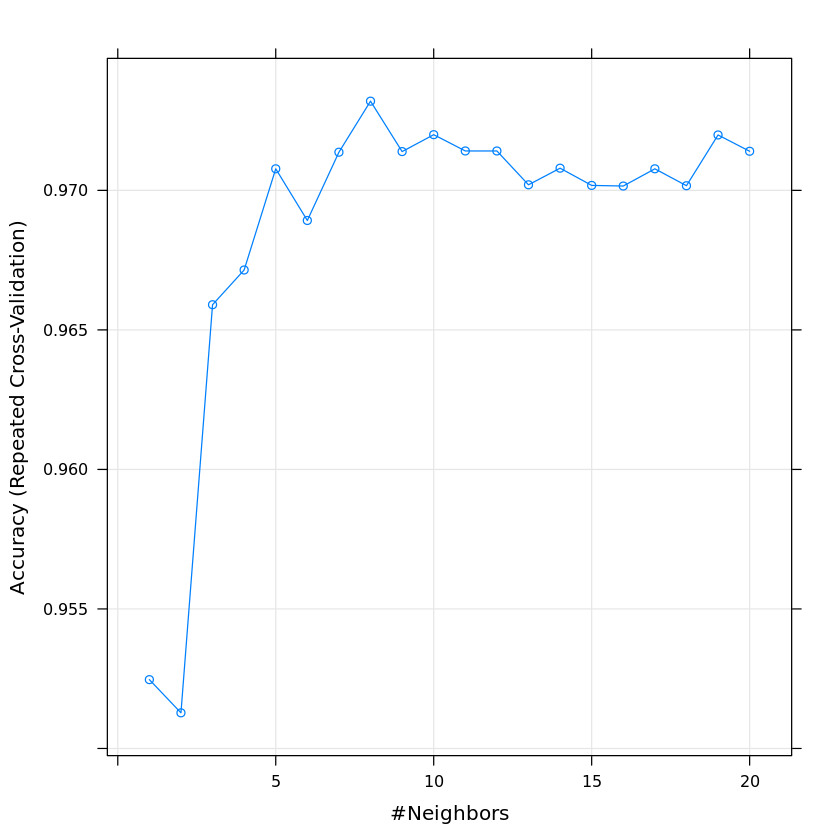

In [93]:
# 10-fold cross-validation with 3 repeats
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"
set.seed(7)
grid <- expand.grid(.k=seq(1,20,by=1))
fit.knn <- train(Class~., data=dataset, method="knn", metric=metric, tuneGrid=grid,
preProc=c("BoxCox"), trControl=trainControl, na.action=na.omit)
print(fit.knn)
plot(fit.knn)

## Observation
- We can see again that tuning has made little difference, 
- settling on a value of k = 8 with
an accuracy of 97.19%. This is higher than the previous 97.14%, 
- but very similar (or perhaps
identical!) to the result achieved by the tuned SVM

# Ensemble Methods
- As a final check, let's look at some boosting and bagging ensemble algorithms on the dataset.
- Let's look at 4 ensemble methods:


 **Bagging**


Bagged CART (BAG) and Random Forest (RF).


 **Boosting** 


Stochastic Gradient Boosting (GBM) and C5.0 (C50)

In [ ]:
install.packages('ipred')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’

Warning message in install.packages("ipred"):
“installation of package ‘numDeriv’ had non-zero exit status”

In [ ]:
# 10-fold cross-validation with 3 repeats
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"
# Bagged CART
set.seed(7)
fit.treebag <- train(Class~., data=dataset, method="treebag", metric=metric,
trControl=trainControl, na.action=na.omit)
# Random Forest
set.seed(7)
fit.rf <- train(Class~., data=dataset, method="rf", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# Stochastic Gradient Boosting
set.seed(7)
fit.gbm <- train(Class~., data=dataset, method="gbm", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, verbose=FALSE, na.action=na.omit)
# C5.0
set.seed(7)
fit.c50 <- train(Class~., data=dataset, method="C5.0", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, na.action=na.omit)
# Compare results
ensembleResults <- resamples(list(BAG=fit.treebag, RF=fit.rf, GBM=fit.gbm, C50=fit.c50))
summary(ensembleResults)
dotplot(ensembleResults)

## Observation
- We see that Random Forest was the most accurate with a score of 97.26%. 
- Very similar
to our tuned models above. We could spend time tuning the parameters of Random Forest
(e.g. increasing the number of trees) and the other ensemble methods

# Finalize Model
- We now need to nalize the model, which really means choose which model we would like to
use.
- SVM would be a good choice to trade-o space and time complexity
- would not select the Random Forest algorithm given the complexity of
the model. It seems overkill for this dataset, lots of trees with little benet in Accuracy
- The implementation of KNN (knn3()) belongs to the caret package and does
not support missing values. 
- We will have to remove the rows with missing values from the
training dataset as well as the validation dataset.

In [ ]:
# prepare parameters for data transform
set.seed(7)
datasetNoMissing <- dataset[complete.cases(dataset),]
x <- datasetNoMissing[,1:9]
preprocessParams <- preProcess(x, method=c("BoxCox"))
x <- predict(preprocessParams, x)

#### Next we need to prepare the validation dataset for making a prediction. We must:
1. Remove the Id attribute.
2. Remove those rows with missing data.
3. Convert all input attributes to numeric.
4. Apply the Box-Cox transform to the input attributes using parameters prepared on the
training dataset.

In [ ]:
# prepare the validation dataset
set.seed(7)
# remove id column
validation <- validation[,-1]
# remove missing values (not allowed in this implementation of knn)
validation <- validation[complete.cases(validation),]
# convert to numeric
for(i in 1:9) {
validation[,i] <- as.numeric(as.character(validation[,i]))
}
# transform the validation dataset
validationX <- predict(preprocessParams, validation[,1:9])

In [ ]:
# make predictions
set.seed(7)
predictions <- knn3Train(x, validationX, datasetNoMissing$Class, k=9, prob=FALSE)
confusionMatrix(predictions, validation$Class)

#### We can see that the accuracy of the nal model on the validation dataset is 99.26%. This is optimistic because there is only 136 rows,
